# DS 3000 - Assignment [10]

**Student Name**: [Nandhini Natarajan]

**Date**: [November 9, 2024]

### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Question 1: 
load the data directly from the URL into a DataFrame.

In [2]:
url = "https://drive.google.com/uc?id=145n4_o1g5ZMrnV_DZt8tR9rjZLlJvU5K"
birth_weights_df = pd.read_csv(url)

print(birth_weights_df)


      case  bwt  gestation  parity   age  height  weight  smoke
0        1  120      284.0       0  27.0    62.0   100.0    0.0
1        2  113      282.0       0  33.0    64.0   135.0    0.0
2        3  128      279.0       0  28.0    64.0   115.0    1.0
3        4  123        NaN       0  36.0    69.0   190.0    0.0
4        5  108      282.0       0  23.0    67.0   125.0    1.0
...    ...  ...        ...     ...   ...     ...     ...    ...
1231  1232  113      275.0       1  27.0    60.0   100.0    0.0
1232  1233  128      265.0       0  24.0    67.0   120.0    0.0
1233  1234  130      291.0       0  30.0    65.0   150.0    1.0
1234  1235  125      281.0       1  21.0    65.0   110.0    0.0
1235  1236  117      297.0       0  38.0    65.0   129.0    0.0

[1236 rows x 8 columns]


## Question 2: 

Data Prep & EDA
Prepare the data for analysis. Ensure that you address the following:
Perform EDA using the dataset to demonstrate patterns.
Handle any missing data and invalid data. Justify your approach.
Plot a histogram of the birth weight and explain the overall distribution


case           int64
bwt            int64
gestation    float64
parity         int64
age          float64
height       float64
weight       float64
smoke        float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 1174 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   case       1174 non-null   int64
 1   bwt        1174 non-null   int64
 2   gestation  1174 non-null   int64
 3   parity     1174 non-null   int64
 4   age        1174 non-null   int64
 5   height     1174 non-null   int64
 6   weight     1174 non-null   int64
 7   smoke      1174 non-null   int64
dtypes: int64(8)
memory usage: 82.5 KB


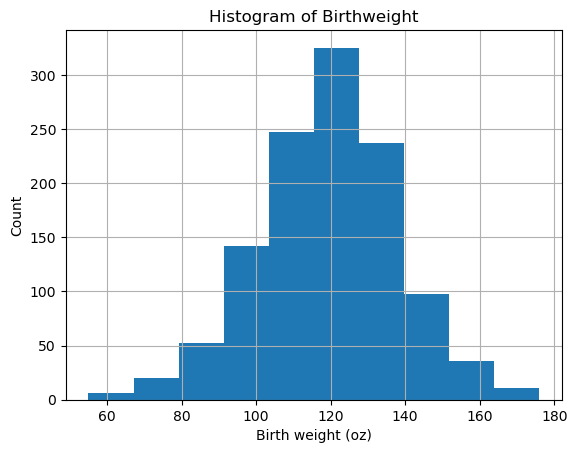

In [3]:
print(birth_weights_df.dtypes)

## drop rows if one value contains NaN values
birth_weights_df.dropna(inplace=True)

##change types
birth_weights_df['case'] = birth_weights_df['case'].astype('int')
birth_weights_df['gestation'] = birth_weights_df['gestation'].astype('int')
birth_weights_df['age'] = birth_weights_df['age'].astype('int')
birth_weights_df['height'] = birth_weights_df['height'].astype('int')
birth_weights_df['weight'] = birth_weights_df['weight'].astype('int')
birth_weights_df['smoke'] = birth_weights_df['smoke'].astype('int')

birth_weights_df.info()
birth_weights_df.describe


birth_weights_df.hist(column='bwt')
plt.xlabel('Birth weight (oz)')
plt.ylabel('Count')
plt.title('Histogram of Birthweight')
plt.show()

EDA anaylsis:

When I was handling missing data, I noticed that our data set a some Nan values throughout the dataset. To handle these values, I used the method of deletion. I deleted the rows that contained a Nan value. This reduced my count to 1174 values. I also changed the float types to int. This is becasue when I looked at the data dictionary, non of the values need to be a float type. 

Histogram Distribution:

Based on my histogram, I can see a normally disributed graph with a peak around 120 oz. The minimum is around 60 while the maximum is around 170. This gives us a range of around 110 oz. There are no clusters or outliers in the histogram. 

## Question 3: 

(5 pts) Feature Selection
Demonstrate which features are useful to build the model. Briefly explain the reason for the features that you selected. Note: You can explore correlations, test hypothesis and/or other techniques. Remember that Data Science relies heavily on experimentation. Therefore, you are encouraged to experiment with your data.
    * Tip #1: ensure that you carefully consider each feature and share the pros and cons of your decisions.
    * Tip #2: you are predicting the birth weight, therefore it should not be one of your explanatory variables.

Case:

This is a feature that is not useful to build my model as it serves as an id number.

Gestation:
This is a feature that is helpful to build my model as it impacts the birthweight of baby. My prediction is the that higher the length of gestation the birthweight would be higher. Gestation might interact with other features, like maternal age or smoking, which could necessitate interaction terms or additional adjustments in the model.

parity:
Parity could influence birth weight, as research suggests that first pregnancies often result in lower birth weights compared to subsequent pregnancies. Including this as a binary indicator (0 or 1) is likely to add useful context. A con of useing this is that we dont know if it is the mother 2nd or 3rd pregancy. We only know that it is not the first. 

age:
Maternal age could correlate with birth weight, as older mothers may have more established health patterns, and younger mothers might have a higher risk of certain complications. This feature could be relevant but would need exploration to verify its effect. The effect of maternal age on birth weight may be non-linear; younger and older maternal ages might both be associated with lower birth weights, which a linear model might not fully capture.

height:
A mother’s height may impact birth weight, as taller mothers might have larger babies due to genetic factors. It’s worth exploring the correlation between maternal height and birth weight. Cons: Height varies widely across populations, and height's association with birth weight could differ among ethnic group

weight:
Maternal weight before pregnancy is a known factor that can influence fetal growth and birth weight. Heavier mothers tend to have babies with higher birth weights, so this feature is likely valuable. Weight could be a proxy for other health conditions which affect birth weight independently

smoke:
Smoking during pregnancy is associated with lower birth weights due to restricted fetal growth. This feature can provide significant insight into birth weight outcomes. Cons: A binary indicator doesn’t account for smoking intensity or frequency.

## Question 4

Data Partitioning
(2 pts) Partition the prepared data into train/test sets, ensure that your partitions are reproducible. Encode any categorical variables in your training set. Then, use the appropriate approach to encode your test set.


In [4]:
#encode the categorical feature 

birth_weights_df = pd.get_dummies(birth_weights_df, drop_first=True)

# partition the prepared data into train/test sets

#input
X = birth_weights_df[['age', 'gestation', 'parity', 'height', 'weight', 'smoke']]
#target
y = birth_weights_df['bwt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)



## Question 5
Model Development
(5 pts) Using the Random Forest algorithm, build a machine learning model that predicts the birth weight. 
Think about the following: Are you performing classification or regression? Ensure that you choose the appropriate Random Forest Classifier/Regressor from scikit-learn.

In [5]:
rf_regressor = RandomForestRegressor(random_state=7)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse.round(2))
print("R-squared:", r2.round(2))

Mean Squared Error: 297.94
R-squared: 0.14


RandomForestRegression is the appropriate model since birth weight is a continuous variable. We are using regression in this example. 

## Question 6
Model Evaluation
(5 pts) Evaluate the predictions from your model and comment on the results. Ensure that you choose the appropriate metric to evaluate the model and round your calculations to two decimal places. Remember that we evaluate models differently depending on the task, i.e. classification or regression.

MSE provides insight into the average squared difference between the pred and actual value. In our case it is 297.943. For our data, I would say that this numer is a little high as 0 would mean that the actual value and predicted value are the same. The value of 297.943 indicates that there a noticable difference between the predicted and actual value. 

R² explains the proportion of variance in the target variable explained by the model. In our case it is 0.138. This shows that 13.8 percent of teh variability in our data is explained by the regression model. since our value is small, it shows that our data is showing a low corralation.

I choose to use RandomForestRegression.


## Question 7

Model Tuning
(5 pts) What are your thoughts on the model's prediction capability? Did it do a good job of predicting the birth weight?
Note: it is okay if your first version of the model is not the best. However, there are strategies that we can use to improve it, such as tuning.
Tune the model: you can control the number of trees in your forest using the n_estimators parameter. Refer to the sample code from the lecture and also view the documentation. to learn more about this algorithm and its parameters. Try at least five different values for the n_estimators parameter to determine if the model improved. Show all your steps to create, evaluate and tune each version of the model.
Indicate which model performed the best.

In [6]:
n_estimators_values = [100, 200, 300, 500, 1000]

results = []

# Loop over the values for n_estimators
for n in n_estimators_values:
    rf_regressor = RandomForestRegressor(n_estimators=n, random_state=7)
    rf_regressor.fit(X_train, y_train)
    
    y_pred = rf_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"n_estimators: {n} | Mean Squared Error: {mse:.2f} | R-squared: {r2:.4f}")
    results.append((n, mse, r2))

best_model = max(results, key=lambda x: x[2])
print(f"\nBest Model -> n_estimators: {best_model[0]} | Mean Squared Error: {best_model[1]:.2f} | R-squared: {best_model[2]:.4f}")


n_estimators: 100 | Mean Squared Error: 297.94 | R-squared: 0.1377
n_estimators: 200 | Mean Squared Error: 296.61 | R-squared: 0.1416
n_estimators: 300 | Mean Squared Error: 296.71 | R-squared: 0.1413
n_estimators: 500 | Mean Squared Error: 295.44 | R-squared: 0.1449
n_estimators: 1000 | Mean Squared Error: 294.57 | R-squared: 0.1475

Best Model -> n_estimators: 1000 | Mean Squared Error: 294.57 | R-squared: 0.1475


I would saw that the models predictive capability didn't do too well as the mse value was rather high and the r^2 value was low. After the new model, we can see that a higher n_estimators value increased the r-squared value and creates a better model.

## Question 8

(15 pts) Perform steps 5-7 using the k-nn algorithm. Perform model tuning using at least 5 different values of k. Show all your steps to create, evaluate and tune each version of the model. Indicate which model performed the best.

In [7]:

k_values = [3, 5, 7, 10, 15]

results = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)

    y_pred = knn_regressor.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    

    print(f"k: {k} | Mean Squared Error: {mse:.2f} | R-squared: {r2:.4f}")
    results.append((k, mse, r2))

best_model = max(results, key=lambda x: x[2])
print(f"\nBest Model -> k: {best_model[0]} | Mean Squared Error: {best_model[1]:.2f} | R-squared: {best_model[2]:.4f}")

k: 3 | Mean Squared Error: 348.63 | R-squared: -0.0090
k: 5 | Mean Squared Error: 332.31 | R-squared: 0.0382
k: 7 | Mean Squared Error: 308.40 | R-squared: 0.1074
k: 10 | Mean Squared Error: 314.75 | R-squared: 0.0890
k: 15 | Mean Squared Error: 305.27 | R-squared: 0.1165

Best Model -> k: 15 | Mean Squared Error: 305.27 | R-squared: 0.1165


## Question 9
(3 pts) Compare both the best model from both the Random Forest and k-NN algorithms and explain which model is the most suitable to predict birthweight. Justify your response.

Based on the mse and r-squared values from the 3 of these models, the random forest with the different n_estimators parameter was the best predictor of birthweight. We can see the the mse and r^2 in the random forest without the n-estimators parameterer was (Mean Squared Error: 297.94, R-squared: 0.14). In the one with the n_estimators parameter it was  (Mean Squared Error: 294.57 | R-squared: 0.1475). In the k-NN algorithms it was (Mean Squared Error: 305.27 | R-squared: 0.1165) when k=15. When comparing the three of these we see the higest r-squared value of 0.1475. We do se a slightly higher mean squared error compared to the 1st random forest model. 

## Question 10 
(+5 bonus points) The Random forest has a method that returns the importance of each feature in your model. Review the documentation to learn about feature importance. After which, write the appropriate code that demonstrates which features were the most important when making the predictions. Visualize the feature importance using the best model and explain the results.

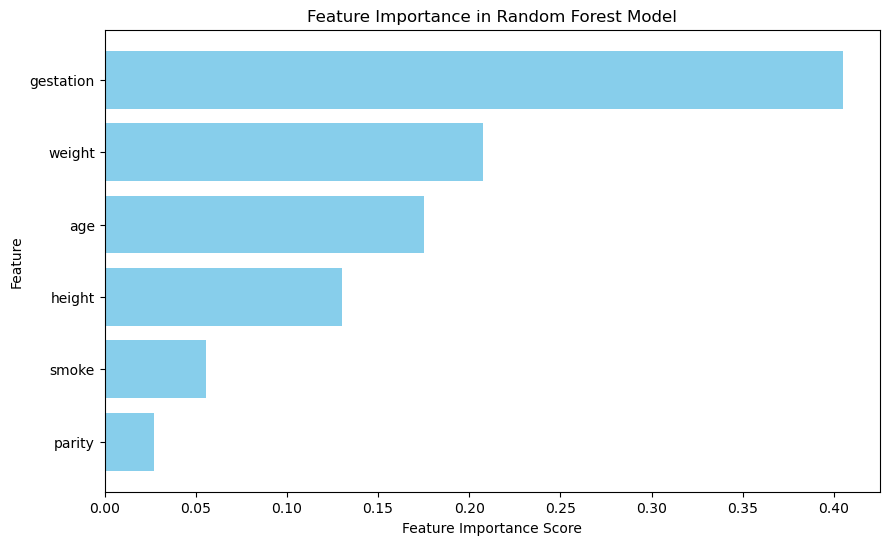

In [8]:
best_rf_regressor = RandomForestRegressor(n_estimators=best_model[0], random_state=7)
best_rf_regressor.fit(X_train, y_train)

feature_importances = best_rf_regressor.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


This shows that genstation was the most important feature when looking at the birthweight of a baby and parity was the least important feature. This suprissed me because I originally thought that smoking and age would be the top two features that impact the childs birthweight.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
